# Example: CR3BP Equations of Motion

Recall that we developed three nondimensional scalar equations of motion for the CR3BP:

$$\begin{aligned}\ddot{x}^* - 2\dot{y}^* - x^* &= -\frac{1 - \pi_2}{\sigma^3}\left(x^* + \pi_2\right) - \frac{\pi_2}{\psi^3}\left(x^* - 1 + \pi_2\right) \\ \ddot{y}^* + 2\dot{x}^* - y^* &= -\frac{1 - \pi_2}{\sigma^3} y^* - \frac{\pi_2}{\psi^3}y^* \\ \ddot{z}^* &= -\frac{1 - \pi_2}{\sigma^3}z^* - \frac{\pi_2}{\psi^3}z^*\end{aligned}$$

To put this into a form that we can solve, we need to solve for the acceleration components:

$$\begin{aligned}\ddot{x}^* &= 2\dot{y}^* + x^*  -\frac{1 - \pi_2}{\sigma^3}\left(x^* + \pi_2\right) - \frac{\pi_2}{\psi^3}\left(x^* - 1 + \pi_2\right) \\ \ddot{y}^* &= - 2\dot{x}^* + y^* -\frac{1 - \pi_2}{\sigma^3} y^* - \frac{\pi_2}{\psi^3}y^* \\ \ddot{z}^* &= -\frac{1 - \pi_2}{\sigma^3}z^* - \frac{\pi_2}{\psi^3}z^*\end{aligned}$$

Now, the state vector is the initial position and velocity of the tertiary mass in the system. We need to provide $\pi_2$, the mass ratio, as the parameter of the system. Remember that:

$$\pi_2 = \frac{m_2}{m_1 + m_2}$$

and

$$\sigma = \sqrt{\left(x^* + \pi_2\right)^2 + y^2 + z^2}$$

and

$$\psi = \sqrt{\left(x^* - 1 + \pi_2\right)^2 + y^2 + z^2}$$

Let's solve this system of equations numerically to find the position of $m$ as a function of (nondimensional) time in the rotating frame of reference.

In [2]:
# %matplotlib notebook
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath

In [3]:
# This code defines a nice shape for the center of mass of the system.
circle = mpath.Path.unit_circle()
wedge_1 = mpath.Path.wedge(90, 180)
wedge_2 = mpath.Path.wedge(270, 0)

verts = np.concatenate([circle.vertices, wedge_1.vertices[::-1, ...], wedge_2.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, wedge_1.codes, wedge_2.codes])
center_of_mass = mpath.Path(verts, codes)

In [4]:
# These masses represent the Earth-Moon system
m_1 = 5.974E24  # kg
m_2 = 7.348E22 # kg
pi_2 = m_2/(m_1 + m_2)

# Define the initial position and velocity components
x_0 = 1 - pi_2
y_0 = .0455
z_0 = 0
vx_0 = -0.5
vy_0 = 0.5
vz_0 = 0
# Then stack everything together into the state vector
r_0 = np.array((x_0, y_0, z_0))
v_0 = np.array((vx_0, vy_0, vz_0))
Y_0 = np.hstack((r_0, v_0))

In [5]:
def nondim_cr3bp(t, Y):
    """Solve the CR3BP in nondimensional coordinates.
    
    The state vector is Y, with the first three components as the
    position of $m$, and the second three components its velocity.
    
    The solution is parameterized on $\\pi_2$, the mass ratio.
    """
    # Get the position and velocity from the solution vector
    x, y, z = Y[:3]
    xdot, ydot, zdot = Y[3:]
    
    # Define the derivative vector
    Ydot = np.zeros(len(Y))
    Ydot[:3] = Y[3:]

    sigma = np.sqrt(((x + pi_2)**2) + (y**2) + (z**2))
    psi = np.sqrt(((x - 1 + pi_2)**2) + (y**2) + (z**2))
    Ydot[3] = 2 * ydot + x - (1 - pi_2)*(x + pi_2)/sigma**3 - pi_2*(x - 1 + pi_2)/psi**3
    Ydot[4] = -2 * xdot + y - (1 - pi_2)*y/sigma**3 - pi_2*y/psi**3
    Ydot[5] = -(1 - pi_2)/sigma**3 * z - pi_2/psi**3 * z
    return Ydot

In [6]:
t_0 = 0  # nondimensional time
t_f = 20  # nondimensional time
t_points = np.linspace(t_0, t_f, 1000)
sol = solve_ivp(nondim_cr3bp, [t_0, t_f], Y_0, t_eval=t_points)

Y = sol.y.T
r = Y[:, :3]  # nondimensional distance
v = Y[:, 3:]  # nondimensional velocity

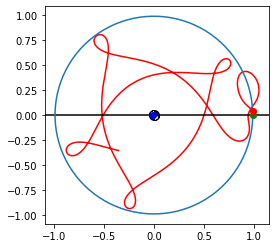

In [7]:
x_2 = (1 - pi_2) * np.cos(np.linspace(0, np.pi, 100))
y_2 = (1 - pi_2) * np.sin(np.linspace(0, np.pi, 100))
x_1 = (-pi_2) * np.cos(np.linspace(0, np.pi, 100))
y_1 = (-pi_2) * np.sin(np.linspace(0, np.pi, 100))
fig, ax = plt.subplots()

# Plot the orbits
ax.plot(r[:, 0], r[:, 1], 'r', label="Orbit")
ax.axhline(0, color='k')
ax.plot(np.hstack((x_2, x_2[::-1])), np.hstack((y_2, -y_2[::-1])))
ax.plot(np.hstack((x_1, x_1[::-1])), np.hstack((y_1, -y_1[::-1])))
ax.plot(0, 0, 'k', marker=center_of_mass, markersize=10)
ax.plot(-pi_2, 0, 'bo', label="$m_1$")
ax.plot(1 - pi_2, 0, 'go', label="$m_2$")
ax.plot(x_0, y_0, 'ro')
ax.set_aspect("equal")

In the co-rotating reference frame, we can get some very interesting behavior of $m$. The behavior of $m$ depends very strongly on the initial conditions that we set.

**See what interesting patterns you can get, and post your efforts on Piazza!**

## Calculating the Jacobi Constant

In the nondimensional coordinates, the Jacobi constant can be calculated as:

$$C = \frac{1}{2} \left(v^*\right)^2 - \frac{1 - \pi_2}{\sigma} - \frac{\pi_2}{\psi} - \frac{1}{2}\left[\left(1 - \pi_2\right)\sigma^2 + \pi_2 \psi^2\right]$$

This value should be constant over the entire trajectory of the tertiary mass.

In [19]:
x = r[:, 0]
y = r[:, 1]
z = r[:, 2]
speed_sq = v[:, 0]**2 + v[:, 1]**2 + v[:, 2]**2

sigma = np.sqrt(((x + pi_2)**2) + (y**2) + (z**2))
psi = np.sqrt(((x - 1 + pi_2)**2) + (y**2) + (z**2))

C = 0.5 * speed_sq - (1 - pi_2) / sigma - pi_2 / psi - 0.5 * ((1 - pi_2) * sigma**2 + pi_2 * psi**2)

We will also calculate the initial value of the Jacobi constant.

In [20]:
sigma_0 = np.sqrt((x_0 + pi_2)**2 + (y_0**2) + (z_0**2))
psi_0 = np.sqrt((x_0 - 1 + pi_2)**2 + (y_0**2) + (z_0**2))
speed_sq_0 = vx_0**2 + vy_0**2 + vz_0**2
C_0 = 0.5 * speed_sq_0 - (1 - pi_2) / sigma_0 - pi_2 / psi_0 - 0.5 * ((1 - pi_2) * sigma_0**2 + pi_2 * psi_0**2)

Now that we have calculated $C$ as a function of time, let's plot it! Hopefully it's constant...

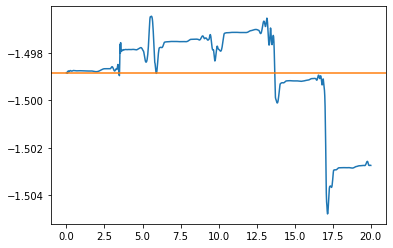

In [31]:
fig, ax = plt.subplots()
ax.plot(sol.t, C)
ax.axhline(C_0, color='C1')

Oh dear. The Jacobi constant varies by about 0.008 (dimensionless) over the trajectory. Keep in mind that a change of $C$ on the order of $10^{-2}$ is the difference from the $L_1$ and $L_2$ points being accessible in the Earth-Moon system. So a change of $8\times 10^{-3}$ is quite large on that scale.

According to [some sources](https://gereshes.com/2019/03/11/matlab-astrodynamics-library-cr3bp/), the problem is the integrator we're using, which doesn't guarantee that the energy is conserved. We can try a more accurate integrator, and also change the precision requirements for the solver. The default is a [5th order Runge-Kutta integrator](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.RK45.html#scipy.integrate.RK45), with absolute and relative tolerances of $10^{-6}$ and $10^{-3}$, respectively.

There are [additional integrator methods](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) provided with the SciPy package. According to their documentation, the `"DOP853"` method is well-suited for high precision computations, which is an 8th order Runge-Kutta integrator. Let's see how that does.

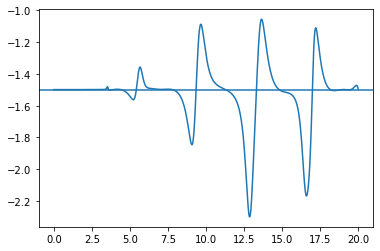

In [17]:
sol_hp = solve_ivp(nondim_cr3bp, [t_0, t_f], Y_0, t_eval=t_points, atol=1e-9, rtol=1e-6, method="DOP853")
Y_hp = sol_hp.y.T
r_hp = Y_hp[:, :3]  # nondimensional distance
v_hp = Y_hp[:, 3:]  # nondimensional velocity

x_hp = r_hp[:, 0]
y_hp = r_hp[:, 1]
z_hp = r_hp[:, 2]
speed_sq_hp = v_hp[:, 0]**2 + v[:, 1]**2 + v[:, 2]**2

sigma_hp = np.sqrt(((x_hp + pi_2)**2) + (y_hp**2) + (z_hp**2))
psi_hp = np.sqrt(((x_hp - 1 + pi_2)**2) + (y_hp**2) + (z_hp**2))

C_hp = 0.5 * speed_sq_hp - (1 - pi_2) / sigma_hp - pi_2 / psi_hp - 0.5 * ((1 - pi_2) * sigma_hp**2 + pi_2 * psi_hp**2)
plt.figure()
plt.plot(sol_hp.t, C_hp)
plt.axhline(C_0, color='C1')

Somewhat unexpectedly, the variation of $C$ with respect to time is larger with this solver than with the other one! The other difference is that the variation is more-or-less periodic. This gives us a hint that the problem might also be related to the physical situation that the tertiary mass finds itself in. Let's plot the distance from the larger mass ($m_1$), given by $\sigma$, on the same plot as the Jacobi constant.

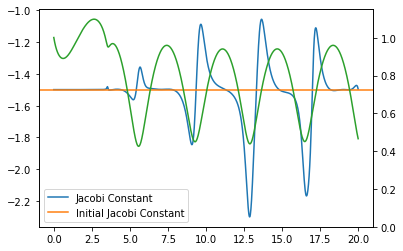

In [34]:
fig, C_ax = plt.subplots()
C_ax.plot(sol_hp.t, C_hp, label="Jacobi Constant")
C_ax.axhline(C_0, color='C1', label="Initial Jacobi Constant")
r_ax = C_ax.twinx()
r_ax.plot(sol_hp.t, sigma_hp, 'C2', label="$\sigma$")
r_ax.set_ylim(0, 1.15)
C_ax.legend(loc='lower left');

As you can see, the error in the Jacobi constant spikes when the tertiary mass gets closer to the primary mass, $m_1$.  This makes a certain amount of sense, because the acceleration terms depend inversely on the cube of this value. As the value of $\sigma$ gets smaller, the error grows.

This error can be avoided by using a different class of numerical integrators, called [**symplectic integrators**](https://en.wikipedia.org/wiki/Symplectic_integrator). We won't have time to discuss those further right now, though. If you're interested in taking a crack at an implementation, you can find sample code here: <http://www.unige.ch/~hairer/software.html>, and you will be interested in the **Structure-Preserving Algorithms**.